In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
# Loading the dataset from the sklearn library
from sklearn.datasets import load_boston

In [141]:
boston = load_boston()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [142]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [143]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [144]:
# printing the filename which we are going to use to implement linear regressino..
print(boston.filename)

boston_house_prices.csv


In [145]:
# values of the data.
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [146]:
# checking or printing the output values.
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [147]:
# description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [148]:
# printing the features in the dataset . 
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [149]:
# going to make the dataframe

dataset = pd.DataFrame(boston.data,columns = boston.feature_names )
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [150]:
# making the dependent value added to the dataset into the dataframe.
dataset['price'] =  boston.target

In [151]:
# checking the dataset for the dependent value is added or not
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [152]:
# getting the information of the dataset like datatypes of the features given.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [153]:
# getting the statistics values for the dataset.
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [154]:
# checking the missing values in the dataset and suming the values.
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [155]:
# performing EDA, for analaysis of the dataset we use Correlation.
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


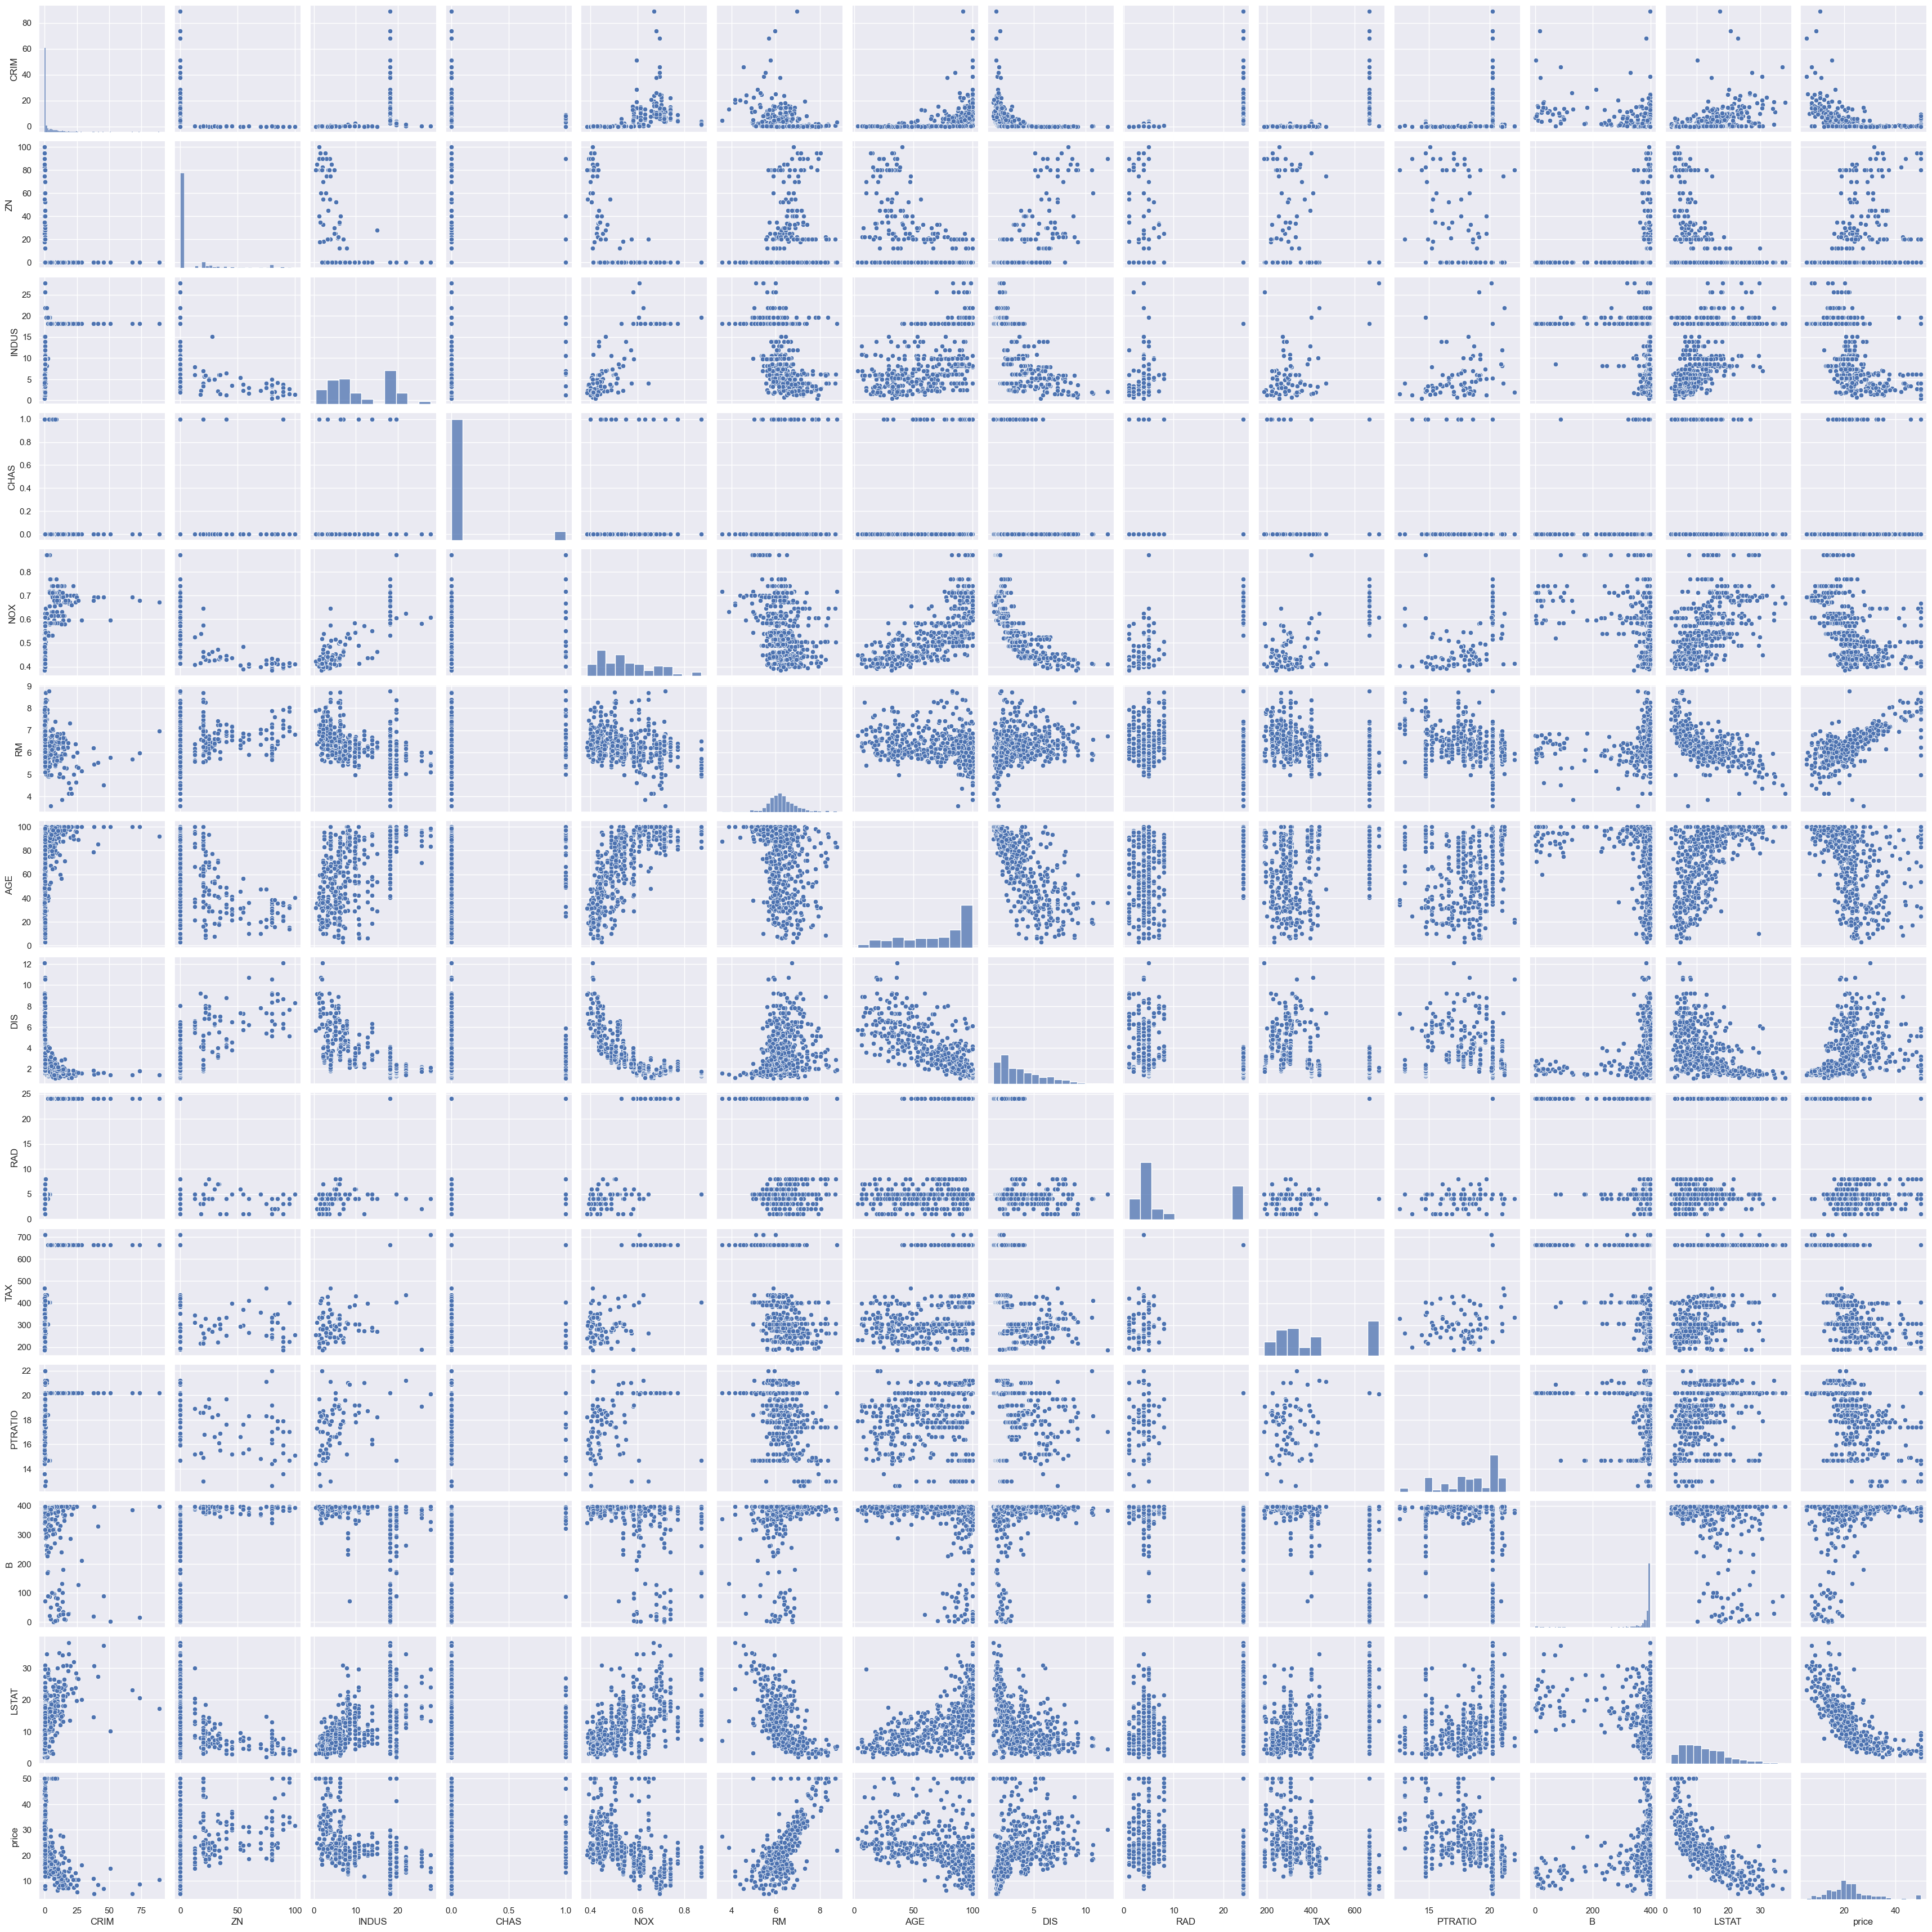

In [156]:
# checking the relationship b/w the variables within the dataset.
import seaborn as sns
sns.pairplot(dataset)


<AxesSubplot: >

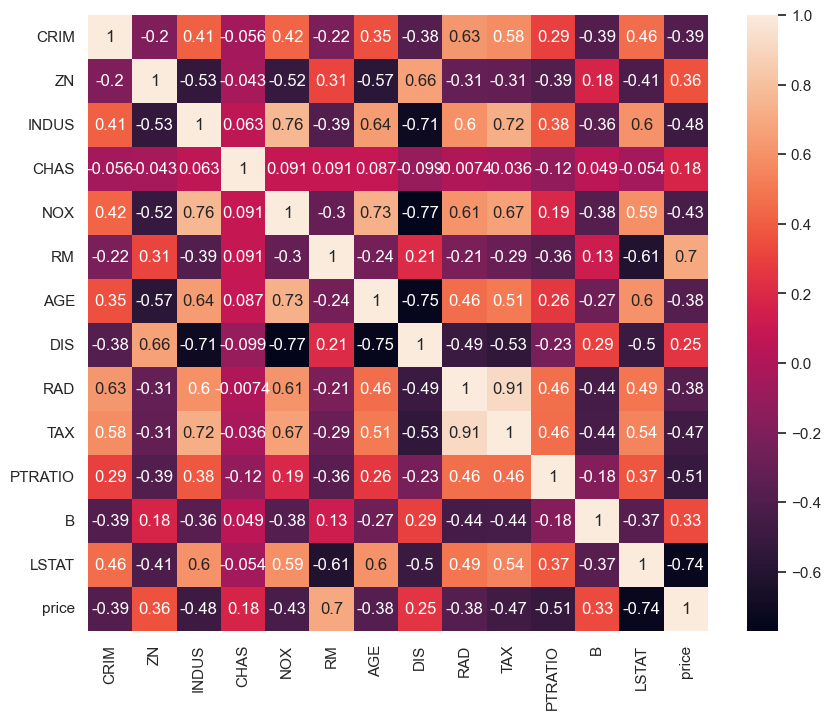

In [157]:
# plotting the heatmap for the dataset related with the correlation.
sns.set(rc={'figure.figsize' : (10,8)})
sns.heatmap(dataset.corr() , annot = True)

<AxesSubplot: >

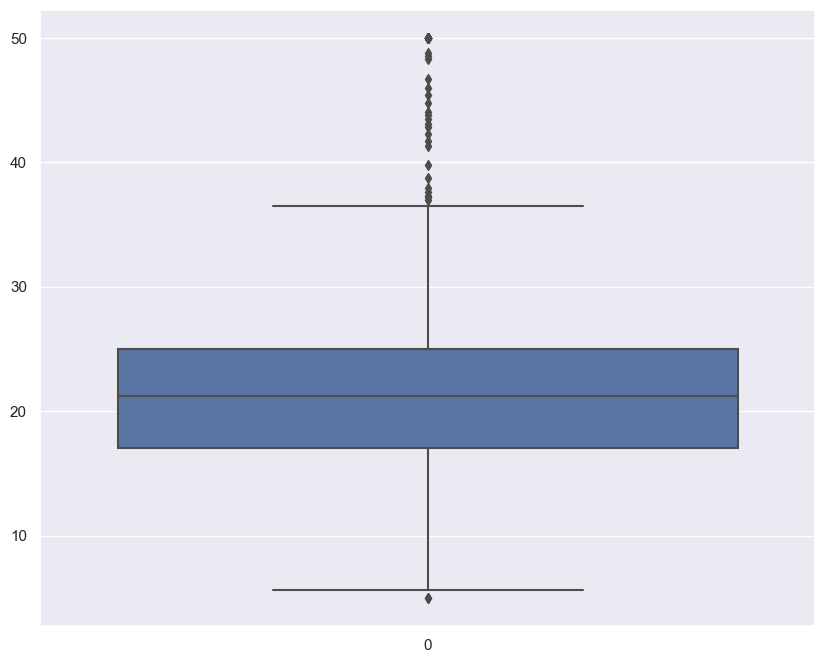

In [158]:
# plotting the boxplot for the dependent variable.
sns.boxplot(dataset['price'])

In [159]:
# splitting the features into dependent and independent variable.
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


In [160]:
# splitting the dataset into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.33,random_state = 42)

In [161]:
x_train.shape

(339, 13)

In [162]:
# standarize or Feature scaling the Dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [163]:
x_train = scaler.fit_transform(x_train)

In [164]:
x_test = scaler.transform(x_test)

In [165]:
x_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [166]:
x_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

In [167]:
# model training 
# Linear Regression model 

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression

LinearRegression()

In [168]:
regression.fit(x_train,y_train)

LinearRegression()

In [169]:
# printing the cofficient .
print(regression.coef_)

[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


In [170]:
# printing the intercept 
print(regression.intercept_)

22.970796460176988


In [171]:
# predicating for the Test data
reg_pred = regression.predict(x_test)

In [172]:
reg_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

<AxesSubplot: ylabel='price'>

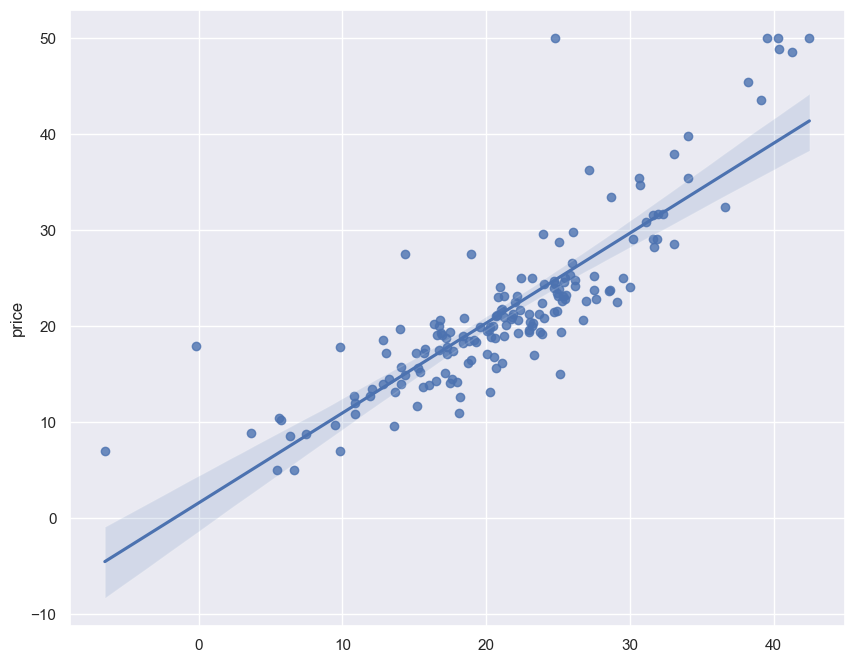

In [173]:
# assumption of the linear regression 
# relationship between Real data and the Predicted Data

import seaborn as sns
import matplotlib.pyplot as plt
#plt.scatter(y_test,reg_pred)
sns.regplot(x= reg_pred,y = y_test,data = dataset)

In [174]:
# calculating residuals 
residuals = y_test - reg_pred
residuals

173   -4.934695
274   -4.218701
491   -2.037511
72    -2.701450
452   -2.609673
         ...   
110    0.642557
321   -1.917346
265   -4.854619
29     0.297942
262    8.417851
Name: price, Length: 167, dtype: float64

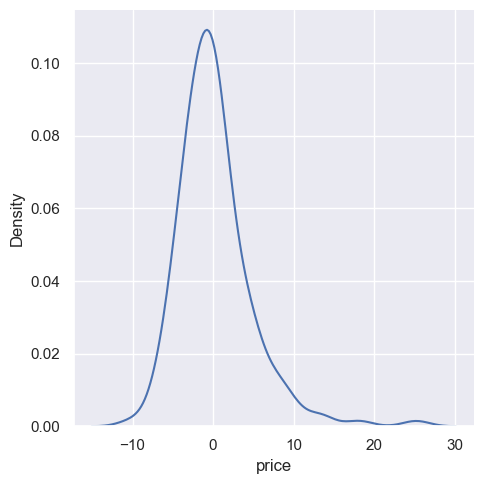

In [175]:
sns.displot(residuals,kind = "kde")

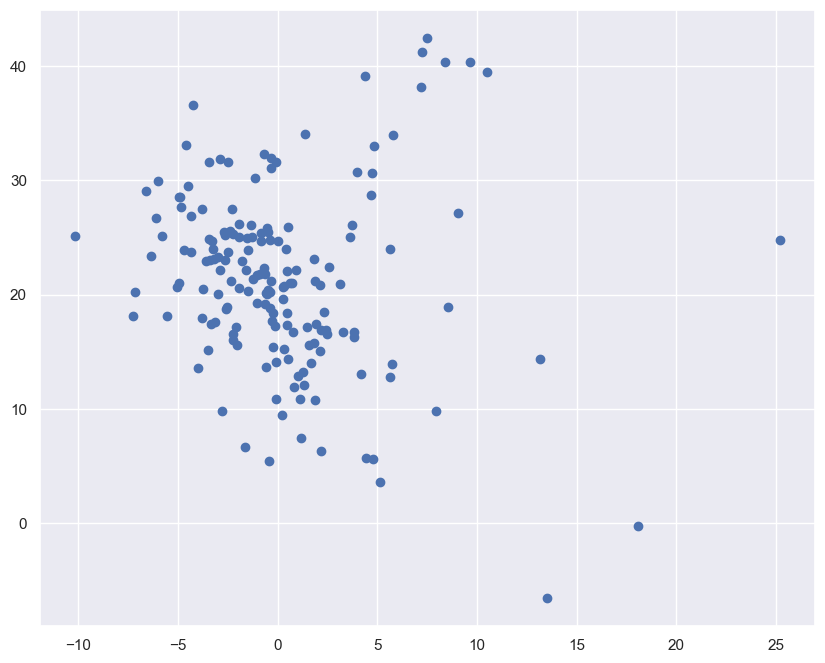

In [176]:
# Scatter plot with predications and residuals.
# uniform Distribution.
plt.scatter(residuals,reg_pred)

In [177]:
# performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))


20.724023437339753
3.148255754816832
4.552364598463062


In [178]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
score

0.7261570836552476

In [179]:
# adjusted r square.
# display ajusted R-Squared.
1 - (1-score) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7028893848808568

# Ridge Training model

In [180]:
# importing the ridge model .
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [181]:
ridge.fit(x_train,y_train)

Ridge()

In [182]:
print(ridge.coef_)

[-0.97541551  0.84608896  0.37564928  0.86738391 -1.86077739  2.81535042
 -0.36108635 -3.00177053  1.95063015 -1.29462251 -2.06972563  1.03867858
 -3.91121554]


In [183]:
print(ridge.intercept_)

22.970796460176988


In [184]:
ridge_pred = ridge.predict(x_test)
ridge_pred
                           

array([28.50742044, 36.56623172, 15.74385228, 25.49107605, 18.70449805,
       23.16555674, 17.3353633 , 14.11553585, 22.94790581, 20.56605905,
       24.89034838, 18.45231813, -6.44592912, 21.85588536, 19.15767075,
       26.02049072, 20.20418625,  5.75334034, 40.26109346, 17.45757103,
       27.43625   , 30.15008183, 10.86542778, 23.8922577 , 17.98002216,
       15.97783016, 23.27084129, 14.39145132, 22.39046559, 19.33913789,
       22.14761798, 25.0633962 , 25.12323651, 18.44886131, 16.56498494,
       17.51980787, 30.71926279, 20.06321173, 24.0051703 , 24.93961773,
       14.01804472, 31.55716108, 42.36411402, 17.74514996, 26.92815913,
       17.13671991, 13.73088718, 26.14522758, 20.23784138, 30.01688815,
       21.23834632, 33.98097943, 15.46847103, 25.98238451, 39.0872846 ,
       22.93270116, 18.79729577, 32.98900997, 24.75121546, 12.88534635,
       22.44620063, 30.6177806 , 31.5496446 , 16.3728183 , 21.07398052,
       16.71642532, 20.21399742, 26.13275151, 31.06390949, 11.90

Text(0, 0.5, 'test predicted data')

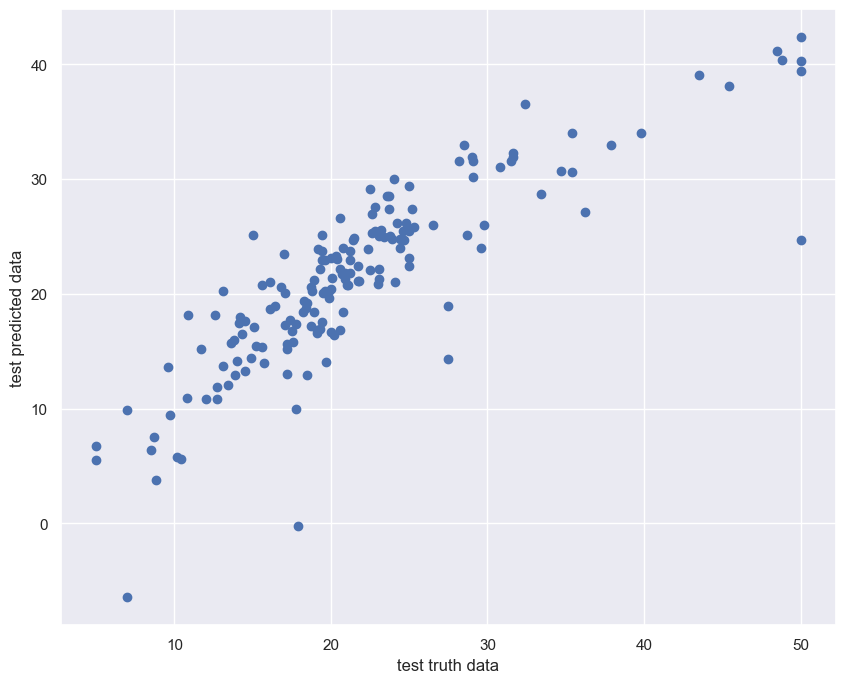

In [185]:
# scattering of ridge model for the y_test and ridge_red
plt.scatter(y_test,ridge_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

In [186]:
residuals = y_test - ridge_pred
residuals

173   -4.907420
274   -4.166232
491   -2.143852
72    -2.691076
452   -2.604498
         ...   
110    0.612742
321   -1.920144
265   -4.804533
29     0.250849
262    8.445592
Name: price, Length: 167, dtype: float64

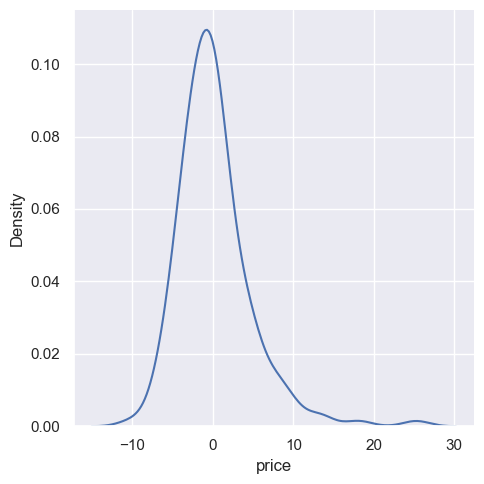

In [187]:
sns.displot(residuals,kind='kde')

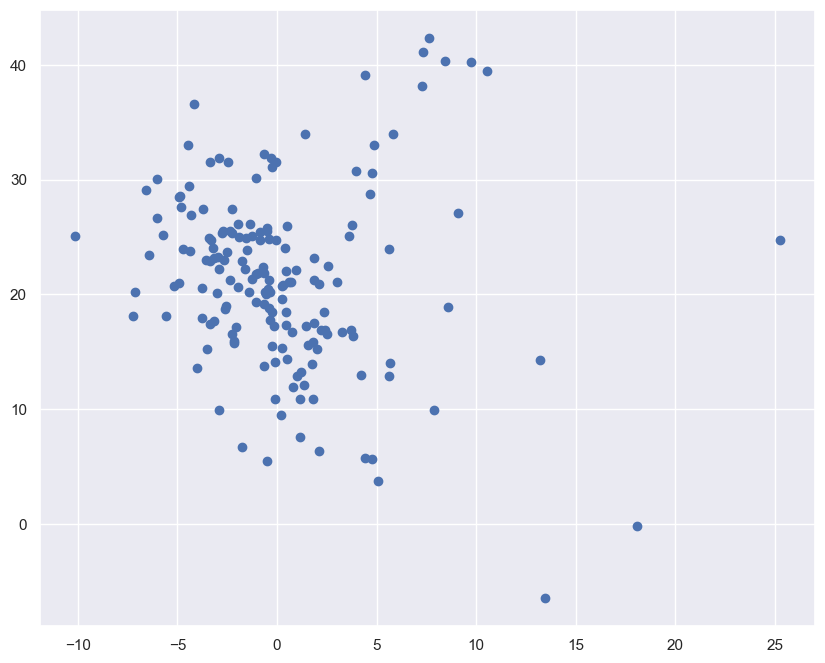

In [188]:
# scatter the plots between the prediction and residuals.
# for uniform distribution.
plt.scatter(residuals,ridge_pred)

In [189]:
# performance matrices .
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))

20.75241632080031
3.146011462661696


In [190]:
# R Squared and adjusted R squared.
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)
score

0.7257819060246209

In [191]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7024823294123338

# LASSO Regression Model .


In [192]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso()

In [193]:
lasso.fit(x_train,y_train)

Lasso()

In [194]:
print(lasso.coef_)

[-0.          0.         -0.          0.27140271 -0.          2.62932147
 -0.         -0.         -0.         -0.         -1.21106809  0.29872625
 -3.81788375]


In [195]:
print(lasso.intercept_)

22.970796460176988


In [196]:
lasso_pred = lasso.predict(x_test)

In [197]:
lasso_pred

array([26.08015466, 30.7480057 , 17.78164882, 25.25224684, 19.28387274,
       22.81161765, 18.31125182, 14.6359243 , 21.41277818, 20.44276659,
       20.7857368 , 21.00978479,  1.29101416, 22.48591111, 20.4207989 ,
       24.73115299, 18.16643043,  6.95747132, 35.82658816, 18.45664358,
       25.66618031, 26.77096265, 13.79601995, 24.00317031, 18.83677575,
       15.53225538, 22.93567982, 18.81410882, 19.96419904, 19.71394554,
       19.9929271 , 25.48086778, 25.07506471, 19.62299031, 15.87164442,
       20.47826644, 30.90020658, 21.73740698, 21.69357896, 24.78795141,
       14.48946282, 27.49872616, 36.28097645, 19.68302782, 25.54695918,
       17.26691093, 16.01035524, 25.87512519, 19.3705841 , 29.52965183,
       23.10173719, 31.37342903, 17.55332715, 25.82107048, 34.98857199,
       22.91267519, 19.3967501 , 29.34678421, 24.65125376, 16.72971658,
       25.42537393, 30.6751849 , 28.90511192, 18.42571639, 27.56426639,
       14.62706882, 20.02272756, 25.60745002, 28.32959623, 15.91

Text(0, 0.5, 'test predicted data')

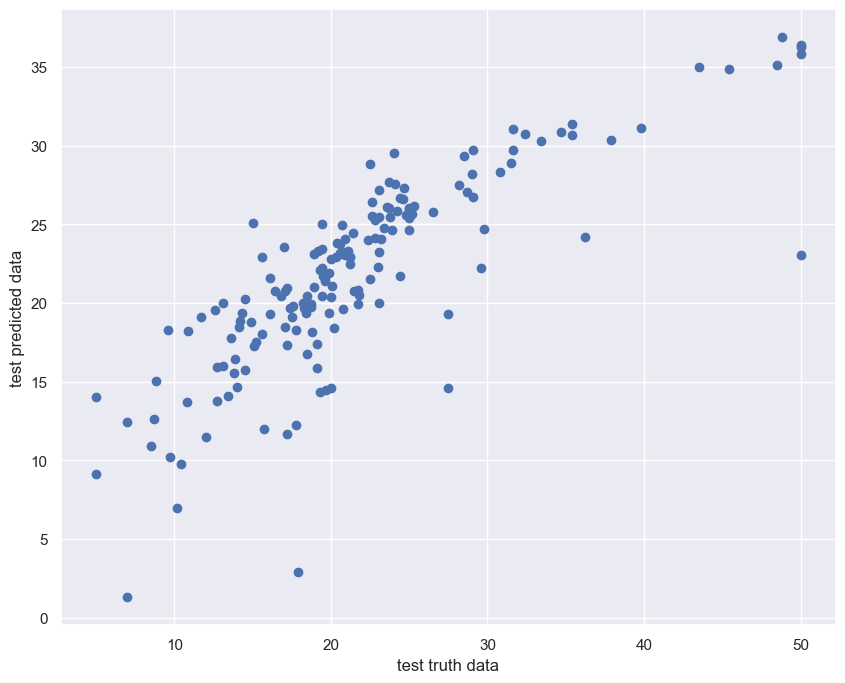

In [198]:
# relationship between Real data and predicted data.
plt.scatter(y_test,lasso_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

In [199]:
residuals = y_test - lasso_pred
residuals

173    -2.480155
274     1.651994
491    -4.181649
72     -2.452247
452    -3.183873
         ...    
110     0.864934
321    -2.373897
265    -1.335776
29     -2.029446
262    11.896754
Name: price, Length: 167, dtype: float64

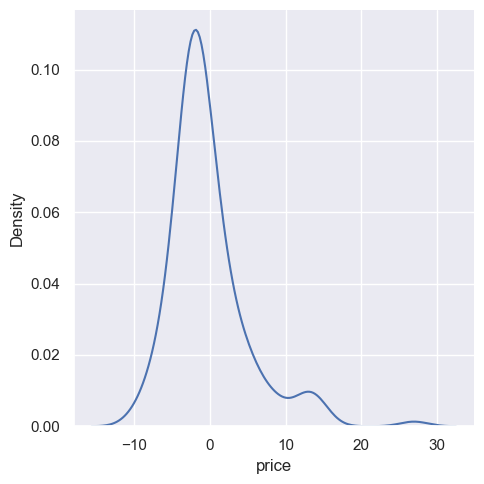

In [200]:
sns.displot(residuals,kind='kde')

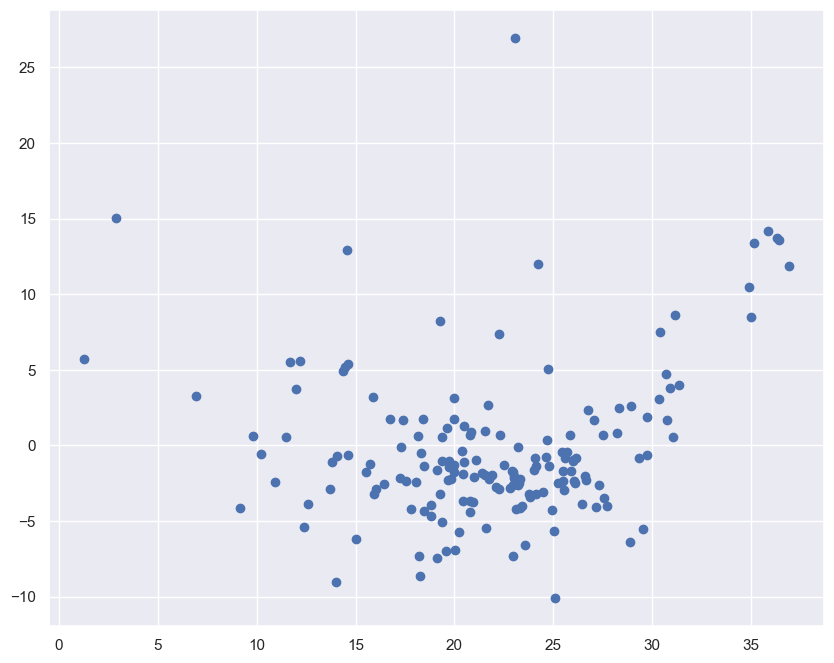

In [201]:
# scatter between the predictions and residuals
# uniform distribution.
plt.scatter(lasso_pred,residuals)

In [202]:
# performance metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,ridge_pred))
print(mean_squared_error(y_test,ridge_pred))

3.146011462661696
20.75241632080031


In [203]:
# R squared and ajusted R squared .
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)
score

0.7257819060246209

In [204]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7024823294123338